# Metropolis Algorithm

Implementation of the Metropolis-Hastings algorithm for sampling complex probability distributions. Demonstrates Markov Chain Monte Carlo methods and convergence to equilibrium.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
def gaussian_function(x):
    f = 1/(np.sqrt(2 * np.pi * sigma**2 )) * np.exp(-(x - mean)**2 / (2 * sigma ** 2))
    return f

In [51]:
%%time

numbers = 10000
step    = 2
x       = 10
tries   = 0

sigma = 2
mean  = 0

accepted_value = []
acceptance     = 0

while np.size(accepted_value) <= numbers:
    tries += 1
    y = x + step * random.choice([1 , -1])
    if random.random() < gaussian_function(y) / gaussian_function(x): 
        x = y
        acceptance += 1
        accepted_value.append(y)

print(f'Acceptance rate: {acceptance / tries}')


Acceptance rate: 0.6084073488258912
Wall time: 12.7 s


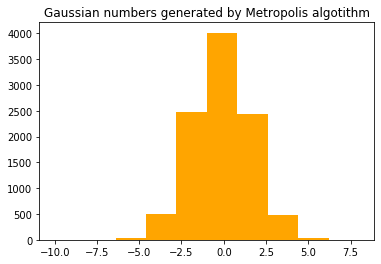

In [52]:
plt.hist(accepted_value, 10, color = 'orange')
plt.title("Gaussian numbers generated by Metropolis algotithm")

plt.savefig("metro.png")

In [54]:
%%time

numbers  = 5000
step_mat = [0.5, 1, 1.5, 2, 2.5, 3.15, 3.6, 4.55, 4.8]
# 0.5, 1, 1.5, 2, 2.5, 3.1, 3.6, 4.55, 4.8

sigma = 2
mean  = 0




for step in step_mat:
    x     = 10
    tries = 0
    
    accepted_value = []
    acceptance     = 0
    while np.size(accepted_value) <= numbers:
        tries += 1
        y = x + step * random.choice([1 , -1])
        if random.random() < gaussian_function(y) / gaussian_function(x): 
            x = y
            acceptance += 1
            accepted_value.append(y)

    print(f'step: {step} and acceptance rate: {acceptance / tries}')


step: 0.5 and acceptance rate: 0.8951136567030606
step: 1 and acceptance rate: 0.7964644051600573
step: 1.5 and acceptance rate: 0.7039695945945946
step: 2 and acceptance rate: 0.5951445912174224
step: 2.5 and acceptance rate: 0.49159539958714243
step: 3.15 and acceptance rate: 0.3911309244486157
step: 3.6 and acceptance rate: 0.336224283985478
step: 4.55 and acceptance rate: 0.19275390248602814
step: 4.8 and acceptance rate: 0.10879544020710509
Wall time: 32.7 s


## correlation lenght

In [3]:
def cj_calculator(x , j):
    i_max = len(x) - j - 1
    mean1 = 0
    mean2 = 0
    mean3 = 0
    
    for i in range(i_max):
        mean1 += x[i]*x[i+j] / len(x)
        mean2 += x[i+j] / len(x)
    mean3 = np.mean(x) * mean2
    c_j   =  (mean1 - mean2) / np.var(x)
    return c_j

step: 0.5 and acceptance rate: 0.9021 and correlation lenght: 33.440783438158746 
step: 1 and acceptance rate: 0.7995 and correlation lenght: 6.693728222326826 
step: 1.5 and acceptance rate: 0.7046 and correlation lenght: 2.7495465976343914 
step: 2 and acceptance rate: 0.593 and correlation lenght: 1.4104500670178297 
step: 2.5 and acceptance rate: 0.4996 and correlation lenght: 0.8150529925811124 
step: 3.1 and acceptance rate: 0.4177 and correlation lenght: 0.3186154914284603 
step: 3.6 and acceptance rate: 0.3413 and correlation lenght: 0 
step: 4.55 and acceptance rate: 0.1918 and correlation lenght: 0 
step: 4.8 and acceptance rate: 0.114 and correlation lenght: 0 
Wall time: 2min 6s


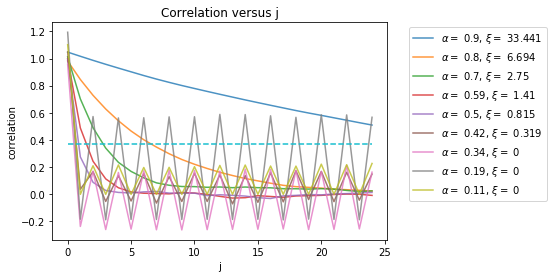

In [52]:
%%time

numbers  = 10000
step_mat = [0.5, 1, 1.5, 2, 2.5, 3.1, 3.6, 4.55, 4.8]
# 0.5, 1, 1.5, 2, 2.5, 3.1, 3.6, 4.55, 4.8

sigma = 2
mean  = 0


for step in step_mat:
    x     = 10
    tries = 0
    
    accepted_value = []
    acceptance     = 0
    
    while np.size(accepted_value) <= numbers:
        tries += 1
        y = x + step * random.choice([1 , -1])
        if random.random() < gaussian_function(y) / gaussian_function(x): 
            x = y
            acceptance += 1
            accepted_value.append(y)
            
    c = np.zeros(25)
    accepted_value = np.array(accepted_value)

    for j in range(np.size(c)):
        c[j] = cj_calculator(accepted_value, j)
    
    l = np.arange(0, 3, 1)
    beta = [0, 0]
    if step_mat.index(step) <= 5:
        beta = np.polyfit( np.log(c[:3]) , l , 1)
    print(f'step: {step} and acceptance rate: {np.round(acceptance / tries, 4)} and correlation lenght: {-beta[0]} ')
    plt.plot(c, alpha = 0.8, label = f'$\u03B1 =$ {np.round(acceptance / tries, 2)}, $\u03Be = $ {np.round(-beta[0], 3)}')


line = np.zeros(np.size(c))
line += 1/np.e
plt.plot(line, '--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation versus j")
plt.ylabel("correlation")
plt.xlabel("j")

plt.savefig("correlation.png")

step: 0.5 and acceptance rate: 0.9083 and correlation lenght: 23.640178463708544 
step: 1 and acceptance rate: 0.803 and correlation lenght: 6.658810439399848 
step: 1.5 and acceptance rate: 0.7086 and correlation lenght: 2.745065476947967 
step: 2 and acceptance rate: 0.6048 and correlation lenght: 1.313341513745372 
step: 2.5 and acceptance rate: 0.506 and correlation lenght: 0.8129195797808313 
step: 3.1 and acceptance rate: 0.4177 and correlation lenght: 0.3698829206301742 
Wall time: 1min


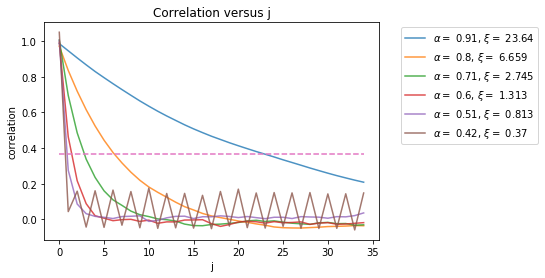

In [55]:
%%time

numbers  = 10000
step_mat = [0.5, 1, 1.5, 2, 2.5, 3.1]
# 0.5, 1, 1.5, 2, 2.5, 3.1, 3.6, 4.55, 4.8

sigma = 2
mean  = 0


for step in step_mat:
    x     = 10
    tries = 0
    
    accepted_value = []
    acceptance     = 0
    
    while np.size(accepted_value) <= numbers:
        tries += 1
        y = x + step * random.choice([1 , -1])
        if random.random() < gaussian_function(y) / gaussian_function(x): 
            x = y
            acceptance += 1
            accepted_value.append(y)
            
    c = np.zeros(35)
    accepted_value = np.array(accepted_value)

    for j in range(np.size(c)):
        c[j] = cj_calculator(accepted_value, j)
    
    l = np.arange(0, 3, 1)
    beta = [0, 0]
    if step_mat.index(step) <= 5:
        beta = np.polyfit( np.log(c[:3]) , l , 1)
    print(f'step: {step} and acceptance rate: {np.round(acceptance / tries, 4)} and correlation lenght: {-beta[0]} ')
    plt.plot(c, alpha = 0.8, label = f'$\u03B1 =$ {np.round(acceptance / tries, 2)}, $\u03Be = $ {np.round(-beta[0], 3)}')


line = np.zeros(np.size(c))
line += 1/np.e
plt.plot(line, '--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Correlation versus j")
plt.ylabel("correlation")
plt.xlabel("j")

plt.savefig("correlation01.png")
